Reverse Engineering From Nutrition Labels
1. create system of equations and equations
2. create loss function
3. gradient descent
4. how to apply this to multiple formulas?

In [16]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [17]:
#creating the overall dictionary: the one representing the nutrition label facts

overall_dict = {}

overall_dict["Fat"] = 0
overall_dict["Saturated fatty acids"] = 0
overall_dict["Fatty acids, total trans"] = 0
overall_dict["Cholesterol"] = 0
overall_dict["Sodium"] = 0
overall_dict["Carbohydrate"] = 0
overall_dict["Fiber"] = 0
overall_dict["Sugars"] = 0
overall_dict["Protein"] = 0
overall_dict["Calcium"] = 0
overall_dict["Iron"] = 0
overall_dict["Potassium"] = 0
overall_dict["Vitamin D"] = 0
overall_dict["Weight"] = 0

In [18]:
tates_dict = overall_dict.copy()
tates_dict["Fat"] = 7 * .357
tates_dict["Saturated fatty acids"] = 4.5 * .357
tates_dict["Fatty acids, total trans"] = 0 * .357
tates_dict["Cholesterol"] = .025 * .357
tates_dict["Sodium"] = .16 * .357
tates_dict["Carbohydrate"] = 18 * .357
tates_dict["Fiber"] = .8 * .357
tates_dict["Sugars"] = 12 * .357
tates_dict["Protein"] = 2 * .357
tates_dict["Calcium"] = .0000001 * .357
tates_dict["Iron"] = .0009 * .357
tates_dict["Potassium"] = .01 * .357
tates_dict["Vitamin D"] = .05 * .357
tates_dict["Weight"] = 28 * .357

this isn't important:
tates_dict = overall_dict.copy()
tates_dict["Fat"] = 7
tates_dict["Saturated fatty acids"] = 4.5
tates_dict["Fatty acids, total trans"] = 0
tates_dict["Cholesterol"] = .025
tates_dict["Sodium"] = .16
tates_dict["Carbohydrate"] = 18
tates_dict["Fiber"] = .8
tates_dict["Sugars"] = 12
tates_dict["Protein"] = 2
tates_dict["Calcium"] = .0000001
tates_dict["Iron"] = .0009
tates_dict["Potassium"] = .01
tates_dict["Vitamin D"] = .05
tates_dict["Weight"] = 28

In [19]:
tates_dict

{'Fat': 2.4989999999999997,
 'Saturated fatty acids': 1.6065,
 'Fatty acids, total trans': 0.0,
 'Cholesterol': 0.008925,
 'Sodium': 0.05712,
 'Carbohydrate': 6.426,
 'Fiber': 0.2856,
 'Sugars': 4.284,
 'Protein': 0.714,
 'Calcium': 3.5699999999999995e-08,
 'Iron': 0.0003213,
 'Potassium': 0.00357,
 'Vitamin D': 0.01785,
 'Weight': 9.995999999999999}

In [20]:
# function to transform the website information to dictionaries (with the keys of overall_dict) 

file1 = "flour_unbleached_enriched_allpurpose_wheat.csv"
file2 = "butter_salted.csv"

ingredient_dict = overall_dict.copy()

def reader(file,ingredient_dict):
    with open(file, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for i,row in enumerate(csvreader):
            if len(row) > 0 and row[0] in ingredient_dict:
                if row[2] == "mg":
                    ingredient_dict[row[0]] = float(row[1]) / 1000
                elif row[2] == "mcg":
                    ingredient_dict[row[0]] = float(row[1]) / 1000000
                else: #grams
                    ingredient_dict[row[0]] = float(row[1])
            if i == 4:
                index = row.index("g")
                ingredient_dict["Weight"] = float(row[index-1])
    return ingredient_dict

In [21]:
reader(file2,ingredient_dict)

{'Fat': 8.111,
 'Saturated fatty acids': 5.137,
 'Fatty acids, total trans': 0.328,
 'Cholesterol': 0.0215,
 'Sodium': 0.0643,
 'Carbohydrate': 0.01,
 'Fiber': 0.0,
 'Sugars': 0.01,
 'Protein': 0.09,
 'Calcium': 0.0024,
 'Iron': 0.0,
 'Potassium': 0.0024,
 'Vitamin D': 0.0,
 'Weight': 10.0}

In [51]:
#the various ingredients in Tate's. Transforming the online nutrritional information of each ingredient into individual dictionaries.

semi_sweet_chocolate_file = "semisweet_chocolate_chips_by_raleys.csv"
semi_sweet_chocolate_dict = overall_dict.copy()
reader(semi_sweet_chocolate_file,semi_sweet_chocolate_dict)

unbleached_flour_file = "flour_unbleached_enriched_allpurpose_wheat.csv"
unbleached_flour_dict = overall_dict.copy()
reader(unbleached_flour_file,unbleached_flour_dict)

salted_butter_file = "butter_salted.csv"
salted_butter_dict = overall_dict.copy()
reader(salted_butter_file,salted_butter_dict)

cane_sugar_file = "granulated_pure_cane_sugar.csv"
cane_sugar_dict = overall_dict.copy()
reader(cane_sugar_file,cane_sugar_dict)

brown_cane_sugar_file = "brown_sugar_cane_by_frusecha.csv"
brown_cane_sugar_dict = overall_dict.copy()
reader(brown_cane_sugar_file,brown_cane_sugar_dict)

eggs_file = "egg_fresh_raw_whole.csv"
eggs_dict = overall_dict.copy()
reader(eggs_file,eggs_dict)

baking_soda_file = "leavening_agents_baking_soda.csv"
baking_soda_dict = overall_dict.copy()
reader(baking_soda_file,baking_soda_dict)

salt_file = "salt_table.csv"
salt_dict = overall_dict.copy()
reader(salt_file,salt_dict)

natural_vanilla_flavor_file = "vanilla_flavoring_syrup_by_r_torre__coinc.csv"
natural_vanilla_flavor_dict = overall_dict.copy()
reader(natural_vanilla_flavor_file,natural_vanilla_flavor_dict)

dictionary_list = [semi_sweet_chocolate_dict,unbleached_flour_dict,salted_butter_dict,cane_sugar_dict,brown_cane_sugar_dict,eggs_dict,baking_soda_dict,salt_dict,natural_vanilla_flavor_dict]
key_list = ["Fat","Saturated fatty acids","Fatty acids, total trans","Cholesterol","Sodium","Carbohydrate","Fiber","Sugars","Protein","Calcium","Iron","Potassium","Vitamin D","Weight"]

In [135]:
#creates a list of whatever inputted number (a list of 9 numbers in this case)

def building_x_list(number):
    x_list = []
    for variable in range(0, len(dictionary_list)):
        x_list.append(number)
    return x_list

x_list = building_x_list(.8)

#getting the equations. and the gradients. because each variable has a degree of one, the gradients with respect to
#each variable is just the constant before that variable

#equations. This evaluates each equation (14 in this case) with the assumed inputted variable values.

def equations(dictionary_list,x_list):
    list_of_equations = []
    for key in key_list:
        equation = 0
        for i,dictionary in enumerate(dictionary_list):
            equation = equation + (dictionary[key] * (x_list[i]))
        #subtracting tates. This is because initially we had a1x1 + a2x2 + ... + anxn = some constant C (the tates value in this case)
        #so now, we have a1x1 + a2x2 + ... + anxn - C = 0.
        list_of_equations.append(equation-(tates_dict[key]))
    return list_of_equations

#gradients. The first list is a list of partial derivatives of the first equation, and the list is in order of partial derivatives
#of x1,...,xn. The second list is a list of partial derivatives of the second equation, etc. The returned list is a list of each
#of these lists

def gradients(dictionary_list,x_list):
    list_of_gradients_of_equations = []
    for key in key_list:
        gradient = []
        for dictionary in dictionary_list:
            gradient.append(dictionary[key])
        list_of_gradients_of_equations.append(gradient)
    #max_equation = max(abs(eq) for eq in list_of_equations)
    #list_of_equations = [eq / max_equation for eq in list_of_equations]
    return list_of_gradients_of_equations

In [304]:
#can't just have that the values are descending because the serving sizes are different! should we do equal serving sizes?

penalty_constant = 1

def parameters(x_list,penalty_constant):
    list_of_parameters = []
    list_of_parameters_over_0 = []
    for i in range(0,len(x_list)-1):
        parameter_for_over_0 = penalty_constant * ((max(0,(-1 * x_list[i]))) ** 2)
        list_of_parameters_over_0.append(parameter_for_over_0)
        parameter_for_inequality_individual_variable_list = building_x_list(0)
        for j in range(i+1,len(x_list)):
            parameter_for_inequalities = penalty_constant * ((max(0, x_list[j] - x_list[i])) ** 2)
            parameter_for_inequality_individual_variable_list[j-1] = parameter_for_inequalities
        list_of_parameters.append(parameter_for_inequality_individual_variable_list)

    #the last variable. because my above loop goes from 0 to the n-1 variable. 
    list_of_parameters_over_0.append(10 * (max(0,-x_list[-1]) ** 2))
    list_of_parameters.append(list_of_parameters_over_0)

    #what does this parameters list look like????
    return list_of_parameters

#needs to be looked at...
def gradients_of_parameters(x_list,penalty_constant):
    list_of_gradients_of_parameters = []
    list_gradient_over_0 = building_x_list(0)
    for i in range(0,len(x_list)-1):
        list_gradient_over_0[i] = (-2 * penalty_constant) * max(0, -x_list[i])
        penalty_gradients_inequalities = building_x_list(0)
        for j in range(i+1,len(x_list)):
            penalty_gradients_inequalities[i] = penalty_gradients_inequalities[i] + ((-2 * penalty_constant) * max(0, x_list[j] - x_list[i]))
            penalty_gradients_inequalities[j] = (2 * penalty_constant) * max(0, x_list[j] - x_list[i])
        list_of_gradients_of_parameters.append(penalty_gradients_inequalities)
    list_gradient_over_0[-1] = (-2 * penalty_constant) * max(0, -x_list[-1])
    list_of_gradients_of_parameters.append(list_gradient_over_0)
    
    return list_of_gradients_of_parameters

In [294]:
def normalize_gradients(gradients):
    norm = np.linalg.norm(gradients)
    if norm > 0:
        return [g / norm for g in gradients]
    return gradients

def loss_function(dictionary_list,x_list,penalty_constant):
    list_of_equations = equations(dictionary_list,x_list)
    list_of_parameters = parameters(x_list,penalty_constant)
    loss = 0
    for equation in list_of_equations:
        loss = loss + (equation ** 2)
    for parameter in list_of_parameters:
        loss = loss + (np.sum(parameter))
    return loss

"""def gradient_loss_function(dictionary_list, x_list):
    list_of_equations = equations(dictionary_list, x_list)
    list_of_gradients_of_equations = gradients(dictionary_list, x_list)
    list_of_gradients_loss = building_x_list(0)
    
    # Pair each equation with its corresponding gradient
    for equation, gradient_list_in_question in zip(list_of_equations, list_of_gradients_of_equations):
        for j in range(0, len(gradient_list_in_question)):
            list_of_gradients_loss[j] += 2 * gradient_list_in_question[j] * equation  # Update loss gradient
    
    #list_of_gradients_loss = normalize_gradients(list_of_gradients_loss)
    return list_of_gradients_loss"""

def gradient_loss_function(dictionary_list,x_list):
    list_of_equations = equations(dictionary_list,x_list)
    list_of_gradients_of_equations = gradients(dictionary_list,x_list)
    list_of_gradients_loss = building_x_list(0)
    
    for gradient_list_in_question in list_of_gradients_of_equations:
        for j in range(0,len(gradient_list_in_question)):
            list_of_gradients_loss[j] = list_of_gradients_loss[j] + (2 * gradient_list_in_question[j] * list_of_equations[j])
                
    #list_of_gradients_loss = normalize_gradients(list_of_gradients_loss)
    return list_of_gradients_loss

In [295]:
gradient_loss_function(dictionary_list,[9,8,7,6,5,4,3,-2,1])

[4608.817577260001,
 1902.2893661000003,
 109.94299840000002,
 17.4225,
 48.80405924079995,
 5474.109316305599,
 146.32135680000002,
 4023.9749259600003,
 429.39298440000005]

In [296]:
def gradient_loss_function_with_over_0_parameter(dictionary_list,x_list,penalty_constant):

    initial_gradient_loss = gradient_loss_function(dictionary_list,x_list)

    for i in range(0,len(initial_gradient_loss)):
        x_in_question = x_list[i]
        initial_gradient_loss[i] = initial_gradient_loss[i] + ((-2 * penalty_constant) * max(0,-x_in_question))

    #initial_gradient_loss = normalize_gradients(initial_gradient_loss)
    return initial_gradient_loss

In [297]:
gradient_loss_function_with_over_0_parameter(dictionary_list,[9,8,7,6,5,4,3,-2,1],1)

[4608.817577260001,
 1902.2893661000003,
 109.94299840000002,
 17.4225,
 48.80405924079995,
 5474.109316305599,
 146.32135680000002,
 4019.9749259600003,
 429.39298440000005]

In [342]:
def gradient_loss_function_for_all_parameters(dictionary_list,x_list,penalty_constant):

    initial_gradient_loss = gradient_loss_function_with_over_0_parameter(dictionary_list,x_list,penalty_constant)

    for i in range(0,len(initial_gradient_loss)-1):
        for j in range(i+1, len(initial_gradient_loss)):
            stable_x = x_list[i]
            variable_x = x_list[j]
            initial_gradient_loss[i] = initial_gradient_loss[i] + ((-2 * penalty_constant) * max(0,variable_x - stable_x))
            initial_gradient_loss[j] = initial_gradient_loss[j] + ((2 * penalty_constant) * max(0,variable_x - stable_x))
    
    for i in range(len(initial_gradient_loss)):
        initial_gradient_loss[i] += 2 * 10 * (np.sum(x_list) - 1)
    initial_gradient_loss = normalize_gradients(initial_gradient_loss)
    return initial_gradient_loss

In [343]:
gradient_loss_function_for_all_parameters(dictionary_list,[9,8,7,6,5,4,3,-2,1],1)

[0.5310556207846087,
 0.26531971846993924,
 0.08934121681706171,
 0.0802572479067988,
 0.0833383933116424,
 0.6160128290976752,
 0.09291296451002487,
 0.4726519994860493,
 0.12129497415511663]

In [ ]:
   penalty_gradients_inequalities = []
    penalty_gradients_overall = penalty_gradients_over_0 + penalty_gradients_inequalities
    loss = 0
    gradients = building_x_list(0)
    for i,equation in enumerate(list_of_equations):
        loss = loss + (equation ** 2)
        gradient_list_in_question = list_of_gradients_of_equations[i]
        for j in range(0,len(gradient_list_in_question)):
            #the two? understand the math better here.
            gradients[j] = gradients[j] + (20 * gradient_list_in_question[j] * equation)
    for inequality in list_of_penalties_for_inequalities:
        loss = loss + (10 * (inequality))
    for penalty_gradient in penalty_gradients_overall:
        for i in range(0,len(penalty_gradient)):
            gradients[i] = gradients[i] + penalty_gradient[i]
    penalty = (np.sum(x_list) - 1)**2
    loss += 10 * penalty
    for i in range(len(gradients)):
        gradients[i] += 2 * 10 * (np.sum(x_list) - 1)
    gradients = normalize_gradients(gradients)
    return loss, gradients

In [363]:
# Gradient descent parameters
#x = building_x_list(.2)  # Initial guess
x = [.3,.2,.2,.1,.1,.005,.005,.005]
learning_rate = 0.01
tolerance = 1e-6
max_iters = 1000


def updating_x_values(dictionary_list,x_listy,penalty_constant,clipping):
    fig, ax = plt.subplots()
    for i in range(0,max_iters):
        gradient_loss_list = gradient_loss_function_for_all_parameters(dictionary_list,x_listy,penalty_constant)
        loss_before = loss_function(dictionary_list,x_listy,penalty_constant)
        for j in range(0,len(x_listy)):
            x_listy[j] = x_listy[j] - (learning_rate * gradient_loss_list[j])
            if clipping == True:
                x_listy[j] = max(x_listy[j],0)
        loss_after = loss_function(dictionary_list,x_listy,penalty_constant)
        plt.plot(i,loss_after,"or")
        
        if i > 1 and loss_before < loss_after:
            print("increasing now",i)
            break
    plt.show()
    print("Solution:", x_listy)
    print("Loss at solution:", loss_after)
    x_for_one_serving_of_tates = []
    for x in x_listy:
        x_for_one_serving_of_tates.append(x * 28)
    print("for one serving:", x_for_one_serving_of_tates)
    print("weight:", np.sum(x_listy) * 10)

increasing now 15


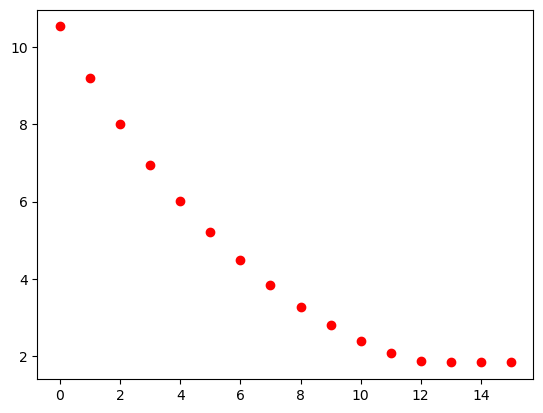

Solution: [0.3664937051660527, 0.2888983339029332, 0.1696269983978867, 0.18461002926731998, 0.09453861153946391, 0, 0, 0, 0]
Loss at solution: 1.8443925105474126
for one serving: [10.261823744649474, 8.089153349282128, 4.749555955140828, 5.169080819484959, 2.6470811231049893, 0, 0, 0, 0]
weight: 11.041676782736564


In [365]:
updating_x_values(dictionary_list,[.4,.3,.2,.2,.1,.1,.005,.005,.005],.2,True)

increasing now 9


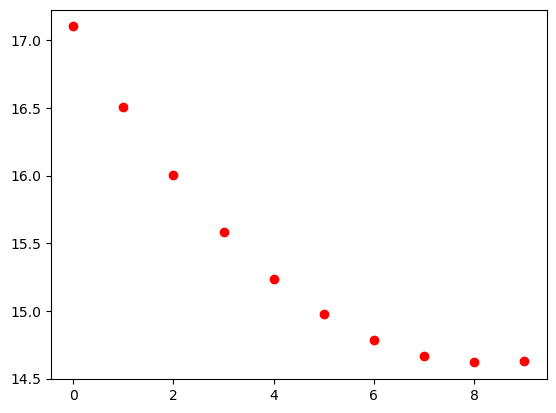

Solution: [0.15409005237934145, 0.12572619347837205, 0.09917600425506586, 0.10052824174195367, 0.07087521712671735, 0.16109913860567043, 0.1044489200178763, 0.14196841015742234, 0.10530952186536541]
Loss at solution: 14.633458711242834
for one serving: [4.314521466621561, 3.5203334173944176, 2.776928119141844, 2.814790768774703, 1.9845060795480858, 4.510775880958772, 2.9245697605005363, 3.9751154844078256, 2.948666612230231]
weight: 10.632216996277847


In [366]:

updating_x_values(dictionary_list,building_x_list(.1),1,True)

increasing now 156


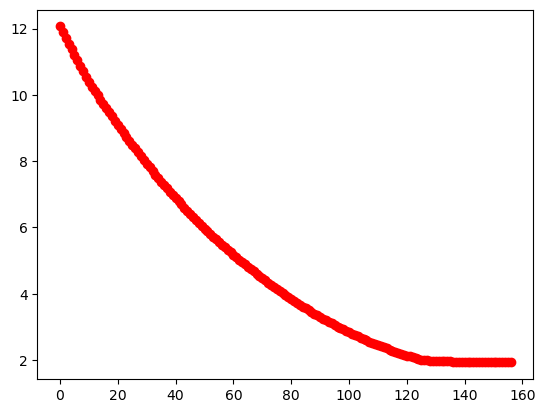

Solution: [0.36758824957791464, 0.28929638998516655, 0.17094935862129337, 0.1843677113995746, 0.0948894934887198, 0, 0, 0, 0]
Loss at solution: 1.9241875335590561
for one serving: [10.29247098818161, 8.100298919584663, 4.786582041396215, 5.1622959191880895, 2.6569058176841547, 0, 0, 0, 0]
weight: 11.070912030726689


In [349]:
updating_x_values(dictionary_list,[.4,.3,.2,.2,.1,.1,.005,.005,.005],10,True)